# Detalhes

## Informações Básicas:
- **🏠 address:** Localização completa da propriedade.
- **📍 district:** Região onde o imóvel está situado.

## Especificações do Imóvel:
- **📏 area:** Tamanho do imóvel em **m²**.
- **🛏️ bedrooms:** Número de quartos disponíveis.
- **🚗 	garage:** Total de vagas na garagem.

## Informações Financeiras:
- **💰 rent:** Valor do aluguel.
- **💵 total:** Soma do aluguel, impostos e outras taxas.

## Tipo do Imóvel:
- **🏢 type:** Tipo de propriedade (apartamento, casa, etc.).


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv',sep=',')
df

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


# Tratando e limpando dados

### Existem valores ausentes ou inconsistentes em alguma coluna?

In [25]:
df.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [26]:
df.describe()

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


In [27]:
df.type.unique()

array(['Studio e kitnet', 'Apartamento', 'Casa em condomínio', 'Casa'],
      dtype=object)

In [28]:
df.sort_values('area').head(10)

,address,district,area,bedrooms,garage,type,rent,total
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
9898,Rua Visconde de Porto Seguro,Jardim dos Estados,1,4,3,Casa em condomínio,8500,11420
962,Rua Engenheiro Bianor,Butantã,1,1,1,Studio e kitnet,2490,2987
5323,Rua Solidônio Leite,Vila Ivone,2,2,2,Casa,2500,2711
11055,Travessa Santa Filomena,Vila Campo Grande,4,1,0,Casa,630,641
1223,Rua Mussumés,Vila Maria Alta,5,1,0,Casa,570,594
7582,Rua Conselheiro Nébias,Campos Elíseos,10,1,0,Studio e kitnet,840,872
4735,Rua Valentim Magalhães,Água Rasa,10,1,0,Apartamento,1400,1454
2636,Rua das Palmeiras,Vila Buarque,10,1,0,Studio e kitnet,1720,2136


Se uma área de 1 m² representar algo válido, como pequenos quiosques ou depósitos, o dado pode ser relevante para análises específicas. No entanto, para outros tipos de imóveis, uma área entre 0 e 4 m² não seria considerada válida.

In [29]:
rm_area_baixa = df.query('area < 5').index
df.drop(rm_area_baixa,inplace=True,axis=0)

# Testando
df.query('area < 5')


,address,district,area,bedrooms,garage,type,rent,total


In [30]:
df.bedrooms.value_counts()

bedrooms
2    4345
1    4191
3    2422
4     542
5      91
0      37
6      23
Name: count, dtype: int64

Não faz sentido uma casa, kitnet ou studio não ter bedrooms (quartos). A maioria desses tipos de imóvel geralmente possui pelo menos um quarto:

Um studio é um tipo de apartamento que também tem um único ambiente, mas normalmente tem um espaço destinado para dormir. Mesmo que não haja uma divisão clara, ele ainda pode ser considerado como tendo "1 quarto", embora seja um espaço aberto.

Um kitnet pode ter um "quarto" embutido no mesmo ambiente. Então, o valor "0" para quartos pode ocorrer, mas não é o mais comum.

Normalmente, uma casa terá pelo menos um ou mais quartos.

**Foi decidido excluir os registros problemáticos,pois a quantidade de dados com valores "0" é pequena, optei por remover essas linhas, pois elas podem prejudicar a análise exploratória.**

In [31]:
rm_zero_quartos = df.query('bedrooms == 0').index
df.drop(rm_zero_quartos,inplace=True,axis=0)

# Testando
df.query('bedrooms == 0')

,address,district,area,bedrooms,garage,type,rent,total


# Análise Exploratória

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11614 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11614 non-null  object
 1   district  11614 non-null  object
 2   area      11614 non-null  int64 
 3   bedrooms  11614 non-null  int64 
 4   garage    11614 non-null  int64 
 5   type      11614 non-null  object
 6   rent      11614 non-null  int64 
 7   total     11614 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 816.6+ KB


### Quantos registros e colunas existem no conjunto de dados?

In [33]:
dimensao_dados = df.shape
print(f'Existe {dimensao_dados[0]} de registros e {dimensao_dados[1]} de colunas nesse conjunto de dados')

Existe 11614 de registros e 8 de colunas nesse conjunto de dados


## Estatísticas Descritivas


### Diferenças principais entre `.agg()` e `.apply()`

| **Aspecto**      | **`.agg()`**                                   | **`.apply()`**                                  |
|-------------------|-----------------------------------------------|------------------------------------------------|
| **Finalidade**    | Agregações diretas e pré-definidas.           | Aplicação de funções personalizadas.           |
| **Escopo**        | Trabalha com colunas como um todo.            | Pode trabalhar com linhas, colunas ou elementos. |
| **Sintaxe**       |  df[["area", "rent", "total"]].agg(["median", "max", "min"])| df[["area", "rent", "total"]].apply(lambda x: {"median": x.median(), "max": x.max(), "min": x.min()})|
| **Desempenho**    | Geralmente mais rápido para operações padrão.  | Pode ser mais lento devido à flexibilidade.     |
| **Resultado**     | Retorna um DataFrame estruturado.              | Retorna uma Series (ou DataFrame, dependendo do caso). |

### Qual é a área média, mínima e máxima dos imóveis?

In [34]:
df[['area','rent','total']].agg(['mean','median','max','min'])

,area,rent,total
mean,84.821767,3254.09566,4084.742724
median,60.000000,2426.00000,3061.500000
max,580.000000,25000.00000,28700.000000
min,5.000000,500.00000,509.000000


### Qual é o aluguel médio por tipo de imóvel?

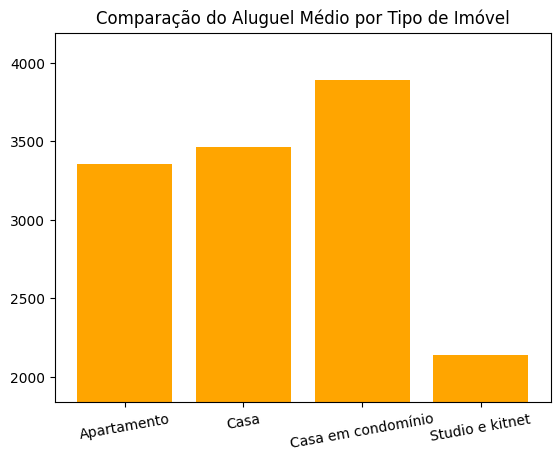

In [35]:
avg_rent_type = df.groupby('type')['rent'].mean()
valores = avg_rent_type.values.tolist()
categoria = avg_rent_type.index
plt.bar(categoria, valores,color='orange')
plt.title("Comparação do Aluguel Médio por Tipo de Imóvel")
plt.ylim(min(valores) -  300,max(valores) + 300)
plt.xticks(rotation=10)
plt.savefig('grafico_comparacao_aluguel_medio_tipo_imovel.png',dpi=300,bbox_inches='tight')
plt.show()


### Qual é o custo total médio por bairro?

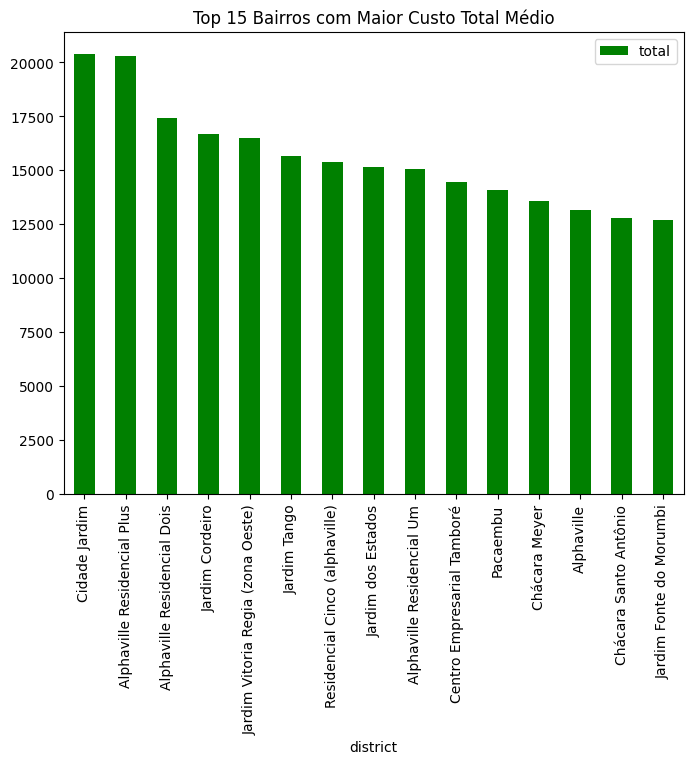

In [36]:
avg_total_bairro = df.groupby('district')['total'].mean().to_frame()
top_bairros_custo = avg_total_bairro.sort_values('total',ascending=False).head(15)
top_bairros_custo.plot(kind='bar',figsize=(8,6),color='green',title='Top 15 Bairros com Maior Custo Total Médio')
plt.savefig('grafico_bairros_maior_custo_total_media.png',dpi=300,bbox_inches='tight')

## Distribuição de Variáveis


### Qual é a distribuição do número de quartos (**bedrooms**)?


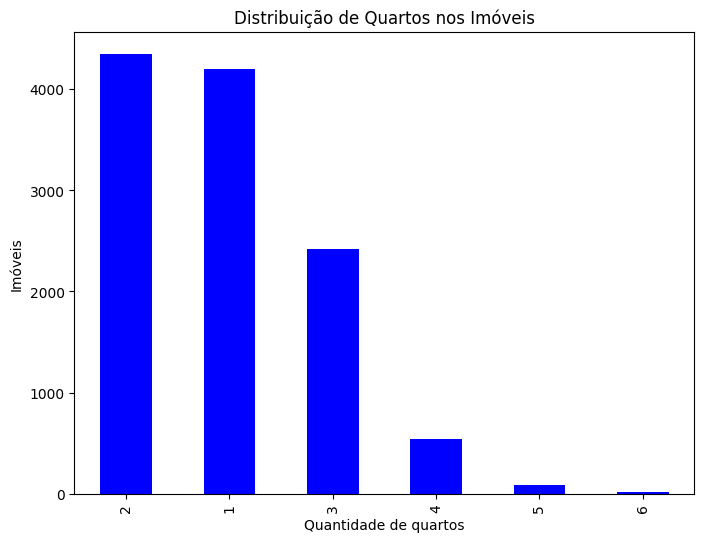

In [37]:
dist_quartos = df.bedrooms.value_counts()
dist_quartos.plot(kind='bar',figsize=(8,6),color='blue',xlabel='Quantidade de quartos',ylabel='Imóveis',title='Distribuição de Quartos nos Imóveis')
plt.savefig('grafico_distribuicao_quartos.png',dpi=300,bbox_inches='tight')

### Quantos imóveis possuem garagem (**garage > 0**)?

In [38]:
com_garagem = df.loc[df['garage'] > 0]
print(f'Existem {com_garagem.shape[0]} imóveis com vaga de garagem')

Existem 7530 imóveis com vaga de garagem


### Qual é a distribuição de imóveis por tipo (**type**) e bairro (**district**)?

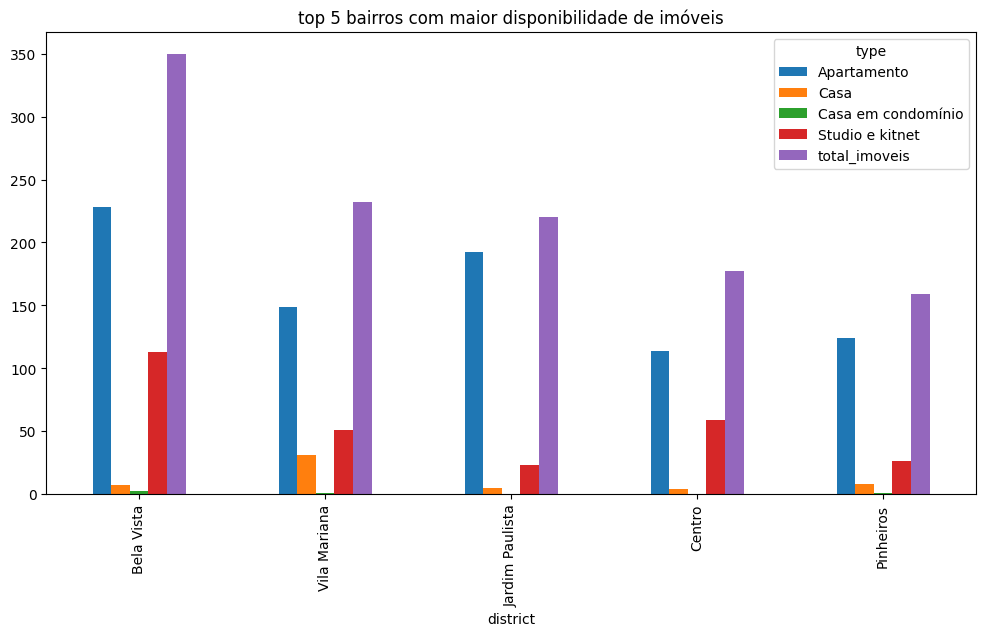

In [39]:
dist_tipo_bairro = df.groupby(['district', 'type']).size().unstack().fillna(0)
dist_tipo_bairro.to_csv('distribuicao_imoveis_por_tipo.csv',sep=';')
dist_tipo_bairro['total_imoveis'] = dist_tipo_bairro['Apartamento'] + dist_tipo_bairro['Casa'] + dist_tipo_bairro['Casa em condomínio'] + dist_tipo_bairro['Studio e kitnet']
top_tipo_bairro = dist_tipo_bairro.sort_values('total_imoveis',ascending=False).head()
top_tipo_bairro.plot(kind='bar',figsize=(12,6),title='top 5 bairros com maior disponibilidade de imóveis')
plt.savefig('grafico_diponibilidade_imoveis.png', dpi=300, bbox_inches='tight')


## Correlação e Relações


## Existe correlação entre o tamanho do imóvel (**area**) e o valor do aluguel (**rent**)?

Sim, existe uma **correlação positiva moderada (0.67)** entre o tamanho do imóvel (**area**) e o valor do aluguel (**rent**), conforme mostrado na matriz de correlação. Isso indica que:

### 📊 Tendência Geral
- Imóveis com maior área tendem a ter aluguéis mais altos.

### 💡 Força da Relação
- A correlação não é perfeita (não está próxima de 1.0), o que significa que outros fatores além da área também afetam o valor do aluguel.


In [40]:
corr_area_rent = df[['area','rent']].corr()

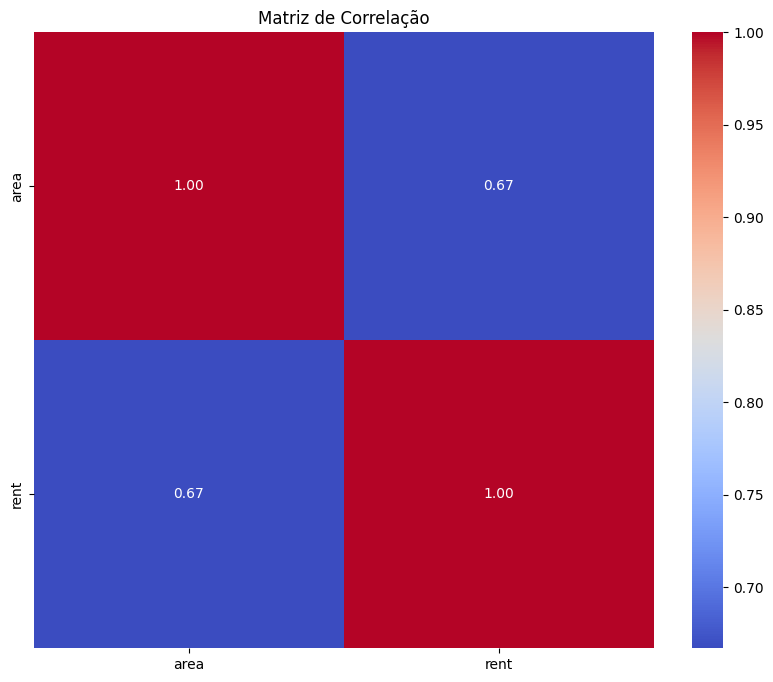

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_area_rent, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Matriz de Correlação")
plt.savefig('grafico_correlacao_area_rent.png', dpi=300, bbox_inches='tight')
plt.show()

### Imóveis com garagem têm custo total maior em comparação aos sem garagem?

Como a média do custo total dos imóveis com garagem é significativamente maior, isso indica que o custo total é, maior para imóveis com garagem.

Média do custo total dos imóveis: 
 SEM garagem: R$ 2220.71 
 COM garagem: R$ 5095.73


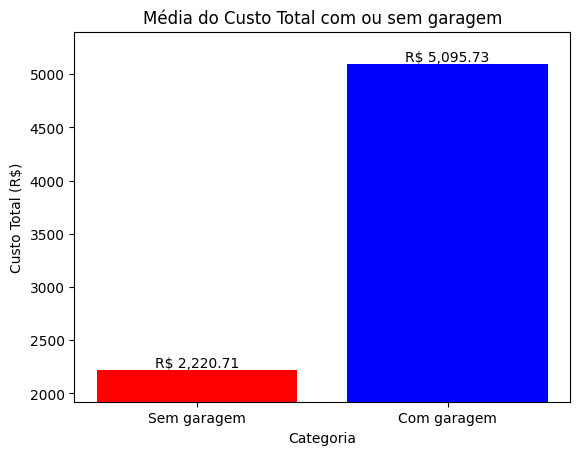

In [42]:
sem_gar = df.loc[df['garage'] == 0]
com_gar = df.loc[df['garage'] > 0]

avg_sem_gar = sem_gar['total'].mean()
avg_com_gar = com_gar['total'].mean()

categoria = ['Sem garagem','Com garagem']
medias = [avg_sem_gar,avg_com_gar]

plt.bar(categoria,medias,color=['red','blue'])
plt.title('Média do Custo Total com ou sem garagem')
plt.ylabel('Custo Total (R$)')
plt.xlabel('Categoria')
plt.ylim([avg_sem_gar - 300 ,avg_com_gar + 300])

for i, v in enumerate(medias):
    plt.text(i,v,f"R$ {v:,.2f}",ha='center',va='bottom')


print(f"Média do custo total dos imóveis: \n SEM garagem: R$ {avg_sem_gar:.2f} \n COM garagem: R$ {avg_com_gar:.2f}")

plt.savefig('grafico_custo_total_com_ou_sem_garagem.png', dpi=300, bbox_inches='tight')
plt.show()


## Comparação por Grupos


### Quais bairros possuem o maior e o menor custo médio de aluguel?

O maior custo médio de aluguel vem do bairro *Alphaville Residencial Dois:* 15000.0

O menor custo médio de aluguel vem do bairro *Jardim Jaçanã:*  500.0

In [43]:
# Quais bairros possuem o maior e o menor custo médio de aluguel?
avg_rent_bairros = df.groupby('district')['rent'].mean().to_frame().sort_values('rent',ascending=False)
avg_rent_bairros


,rent
district,
Alphaville Residencial Dois,15000.0
Alphaville Residencial Plus,15000.0
Jardim Tango,15000.0
Residencial Cinco (alphaville),13600.0
Alphaville Residencial Um,13500.0
...,...
Vila Lais,660.0
Jardim Maraba,630.0
Jardim Frei Galvão,629.0


### Qual tipo de imóvel tem o maior custo total médio?

In [44]:
avg_total_bairros = df.groupby('district')['total'].mean().to_frame().sort_values('total',ascending=False)
avg_total_bairros.head(1)

,total
district,
Cidade Jardim,20380.0


### Quais são os bairros mais acessíveis e os mais caros?


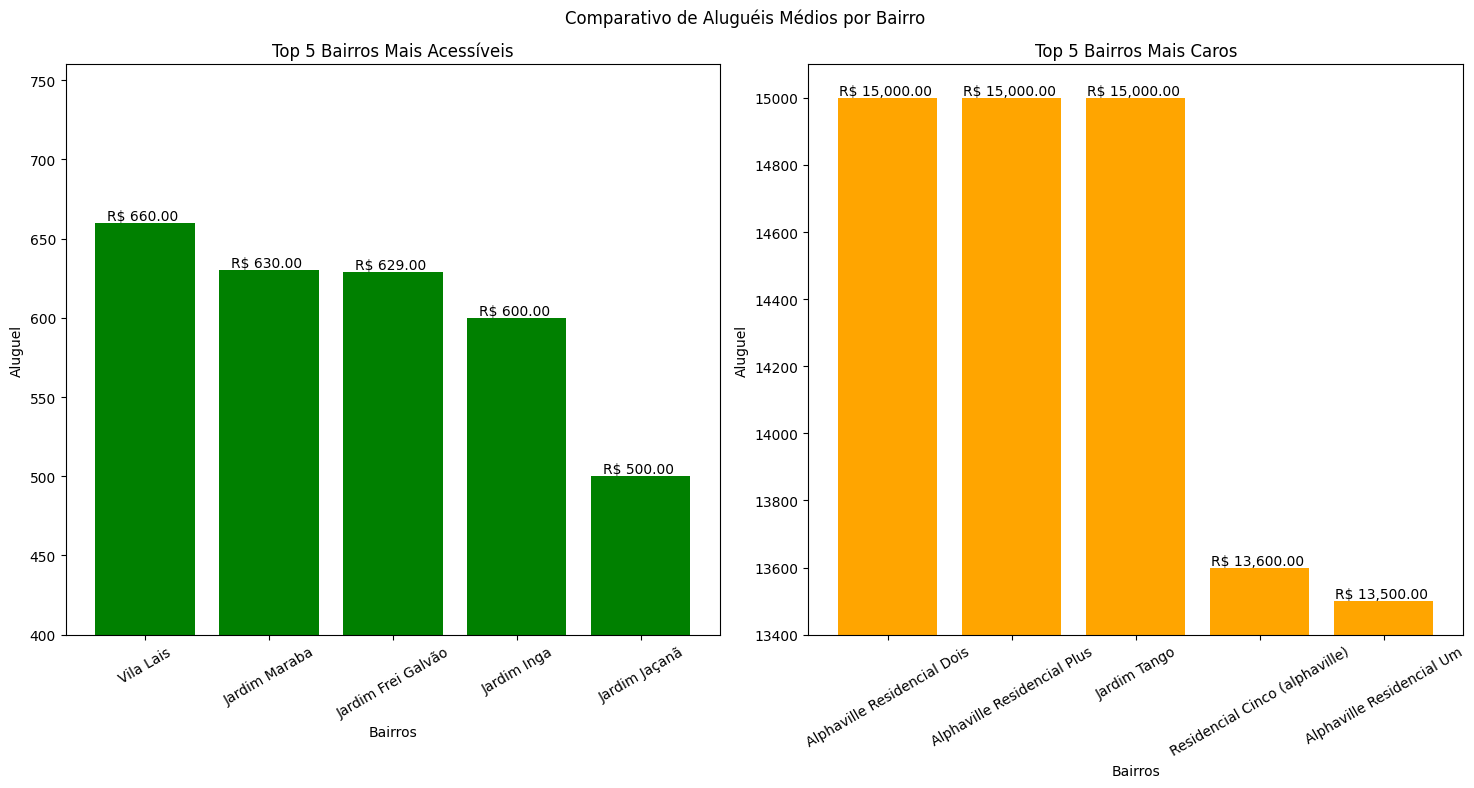

In [45]:
top_caro = avg_rent_bairros.head()
top_barato = avg_rent_bairros.tail()

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].bar(top_barato.index.astype(str), top_barato.rent.tolist(), color='green')
axes[0].set_xlabel('Bairros')
axes[0].set_ylabel('Aluguel')
axes[0].set_title('Top 5 Bairros Mais Acessíveis')
axes[0].tick_params(axis='x', rotation=30)

# Ajustando o intervalo do eixo y para o gráfico de bairros baratos
axes[0].set_ylim([top_barato.rent.min() - 100, top_barato.rent.max() + 100])

axes[1].bar(top_caro.index.astype(str), top_caro.rent.tolist(), color='orange')
axes[1].set_xlabel('Bairros')
axes[1].set_ylabel('Aluguel')
axes[1].set_title('Top 5 Bairros Mais Caros')
axes[1].tick_params(axis='x', rotation=30)

# Ajustando o intervalo do eixo y para o gráfico de bairros caros
axes[1].set_ylim([top_caro.rent.min() - 100, top_caro.rent.max() + 100])

# Adicionando valores numéricos nas barras e formatando
# i: índice (posição do item na lista).
# v: valor (preço de aluguel no bairro correspondente).
# O primeiro parâmetro (i) é a posição no eixo x (o índice do bairro no gráfico).
# O segundo parâmetro (v) é a posição no eixo y (o valor do aluguel).
# O terceiro parâmetro é o texto que será exibido: aqui estamos formatando o valor de aluguel de v.
# ha='center': Alinha o texto horizontalmente no centro da barra. Isso garante que o texto fique centralizado em relação à barra.
# va='bottom': Alinha o texto verticalmente na parte inferior da barra. Isso coloca o texto logo acima da barra, de forma que ele não fique sobreposto à barra.

for i, v in enumerate(top_barato.rent):
    axes[0].text(i, v, f"R$ {v:,.2f} ", ha='center', va='bottom')
 
for i, v in enumerate(top_caro.rent):
    axes[1].text(i, v, f"R$ {v:,.2f} ", ha='center', va='bottom')


plt.suptitle("Comparativo de Aluguéis Médios por Bairro")

plt.tight_layout()
plt.savefig('grafico_aluguel_acessível_vs_caro.png', dpi=300, bbox_inches='tight')
plt.show()
